# Signals Synthesis in Python

In [27]:
import numpy as np
from scipy import signal
from scipy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython.display as display
import math

## Global Parameters

In [30]:
# Sample Rate (Hz)
sampling_rate = 44100 
# length of the Generated Signal (s)
length = 2
# Signal Frequency (Hz)
frequency = 220
# Signal Amplitude (-1, 1)
amplitude = 0.5
# Phase (radians)
theta = math.radians(0)
# Period (s)
period = 1/frequency

# Sine Wave (Pure Tone)

A `sine wave` is a fundamental waveform in many areas of physics, engineering, and mathematics.

A `sine wave` is a periodic waveform, which means that it repeats itself over time. The time it takes for one complete cycle of the waveform is called the `period` `T`, and its inverse is the `frequency` `f`.

A `sine wave` is defined by their frequency `f`, the amplitude `A` and an optional phase $\phi$ parameter.

A sine wave contains a single `frequency` component, which means that all of its energy is concentrated at a single `frequency`. The frequency of the sine wave determines its pitch or tone, and is often measured in `hertz` `Hz`.

The `phase` of a `sine wave` describes its position relative to some reference point in time.

A `sine wave` that starts at `zero phase` has its zero-crossing at `t=0`, and reaches its peak amplitude at `t=1/4` period, which is `pi/2` radians for the standard sine wave function.

The wave then goes through one complete cycle every `2*pi radians`, and repeats this pattern indefinitely.

## Generate Sine Signal using `NumPy`

In [87]:
# Set the x Axis (time)
t = np.linspace(0, length, sampling_rate * length, endpoint=False)
# Generate the sine signal y Axis (Amplitude)
sine = amplitude*np.sin(2*np.pi*frequency*t+theta)

The term `2*π*freq` is also known as the angular frequency ω.

## Fast Fourier Transform using `NumPy`

In [88]:
# Compute the FFT of the signal
fft = rfft(sine)
# Get the frequencies corresponding to the FFT
fft_frequencies = rfftfreq(sampling_rate*length, 1 / sampling_rate)

`rfft` compute the one-dimensional discrete Fourier Transform for real input.

`rfftfreq` return the Discrete Fourier Transform sample frequencies

## Plot Time domain & Frequency domain

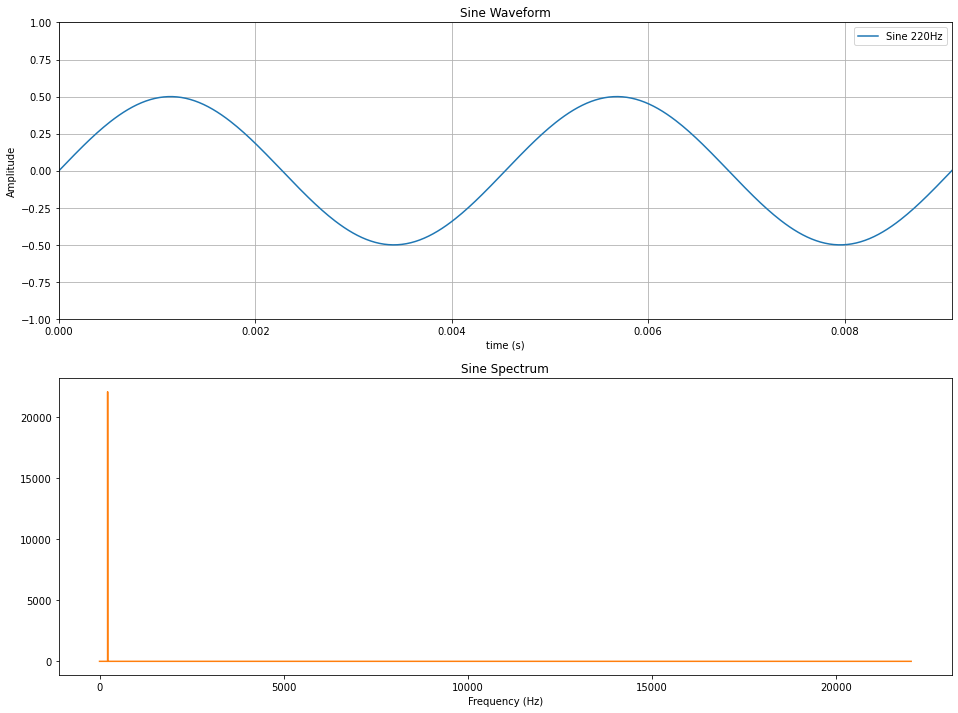

In [89]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
axes[0].plot(t, sine, label=f"Sine {frequency}Hz", color='C0')
axes[0].set_title('Sine Waveform')
axes[0].legend()
axes[0].set_xlabel('time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)
axes[0].set_xlim(0, period*2)
axes[0].set_ylim(-1, 1)
axes[1].plot(fft_frequencies, np.abs(fft), label="Sine", color='C1')
axes[1].set_title('Sine Spectrum')
axes[1].set_xlabel('Frequency (Hz)')
plt.show()

## Export the `sine` signal to  `.wav`

After generated the `sine` signal with `scipy` , we can export our signal with a resolution of `16bit` to `.wav` file using `scipy.wavfile`.

In [90]:
wavfile.write("sine.wav", sampling_rate, np.int16((sine / sine.max()) * 32767))

In [91]:
samplerate, data = wavfile.read('./sine.wav')

In [92]:
print(f'Data container: {type(data)}')
print(f'Data shape: {data.shape}')
print(f'Sampling rate: {samplerate}')
print(f'Bit depth: {data.dtype}')
print(f'Audio length: {data.size/samplerate} seconds')

Data container: <class 'numpy.ndarray'>
Data shape: (88200,)
Sampling rate: 44100
Bit depth: int16
Audio length: 2.0 seconds


In [93]:
sine = display.Audio("./sine.wav")
sine

# Square Signal

To generate a `square signal`, we can use the `square` function from `scipy` signal module.

## Generate Square Signal using `SciPy`

In [94]:
# Set the x Axis (time)
t = np.linspace(0, length, sampling_rate * length, endpoint=False)
# Signal Amplitude (-1, 1)
Amplitude = 0.5
# Generate the square signal y Axis (Amplitude)
square = Amplitude*signal.square(2 * np.pi * frequency * t)

## Fast Fourier Transform using `NumPy`

In [95]:
# Compute the FFT of the signal
fft = rfft(square)
# Get the frequencies corresponding to the FFT
fft_frequencies = rfftfreq(sampling_rate*length, 1 / sampling_rate)

`rfft` compute the one-dimensional discrete Fourier Transform for real input.

`rfftfreq` return the Discrete Fourier Transform sample frequencies

## Plot Time domain & Frequency domain

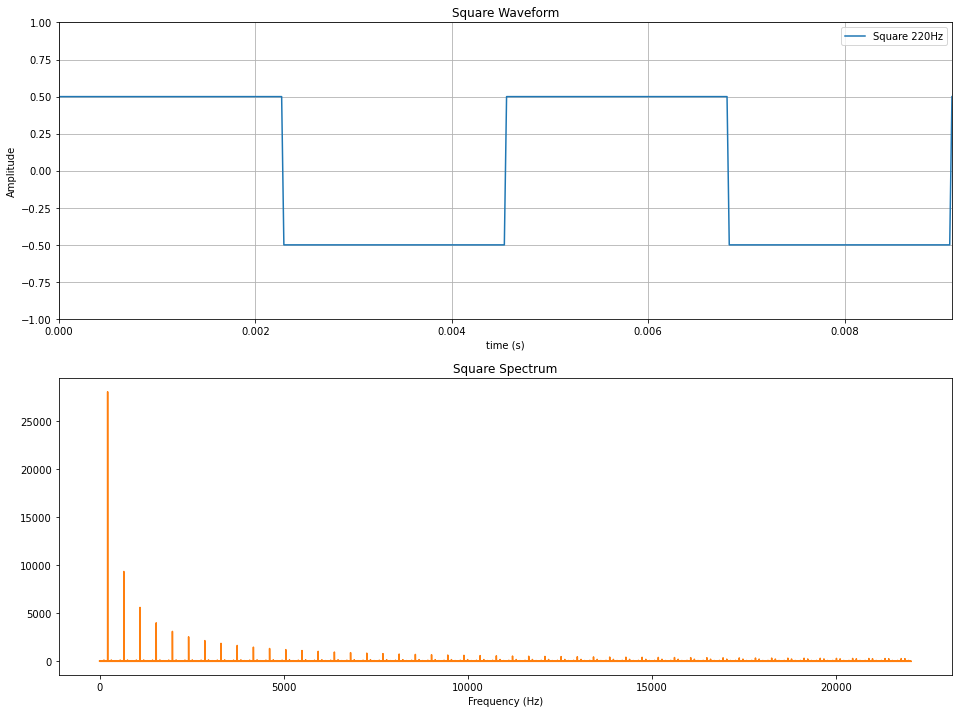

In [96]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
axes[0].plot(t, square, label=f"Square {frequency}Hz", color='C0')
axes[0].set_title('Square Waveform')
axes[0].legend()
axes[0].set_xlabel('time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)
axes[0].set_xlim(0, period*2)
axes[0].set_ylim(-1, 1)
axes[1].plot(fft_frequencies, np.abs(fft), label="Square", color='C1')
axes[1].set_title('Square Spectrum')
axes[1].set_xlabel('Frequency (Hz)')
plt.show()

## Export `square` signal to  `.wav`

After generated the `square` signal with `scipy` , we can export our signal with a resolution of `16bit` to `.wav` file using `scipy.wavfile`.

In [97]:
wavfile.write("square.wav", sampling_rate, np.int16((square / square.max()) * 32767))

In [98]:
samplerate, data = wavfile.read('./square.wav')

In [99]:
square = display.Audio("./square.wav")
square

## Sawtooth Signal

A `sawtooth` signal is a type of periodic waveform that is characterized by a linear rise and a sudden fall. The waveform looks like a `sawtooth` with sharp points along its edges.

To generate a `sawtooth signal`, we can use the `sawtooth` function from `scipy` signal module.

The harmonic content of a sawtooth wave contains a series of harmonics, which are multiples of the fundamental frequency. The amplitudes of the harmonics decrease as the frequency increases, following an inverse relationship.

## Generate Sawtooth Signal using `SciPy`

In [101]:
# Set the x Axis (time)
t = np.linspace(0, length, sampling_rate * length, endpoint=False)
# Signal Amplitude (-1, 1)
amplitude = 0.5
# Generate the sawtooth signal
sawtooth = amplitude*signal.sawtooth(2 * np.pi * frequency * t)

## Fast Fourier Transform using `NumPy`

In [102]:
# Compute the FFT of the signal
fft = rfft(sawtooth)
# Get the frequencies corresponding to the FFT
fft_frequencies = rfftfreq(sampling_rate*length, 1 / sampling_rate)

`rfft` compute the one-dimensional discrete Fourier Transform for real input.

`rfftfreq` return the Discrete Fourier Transform sample frequencies

## Plot Time domain & Frequency domain

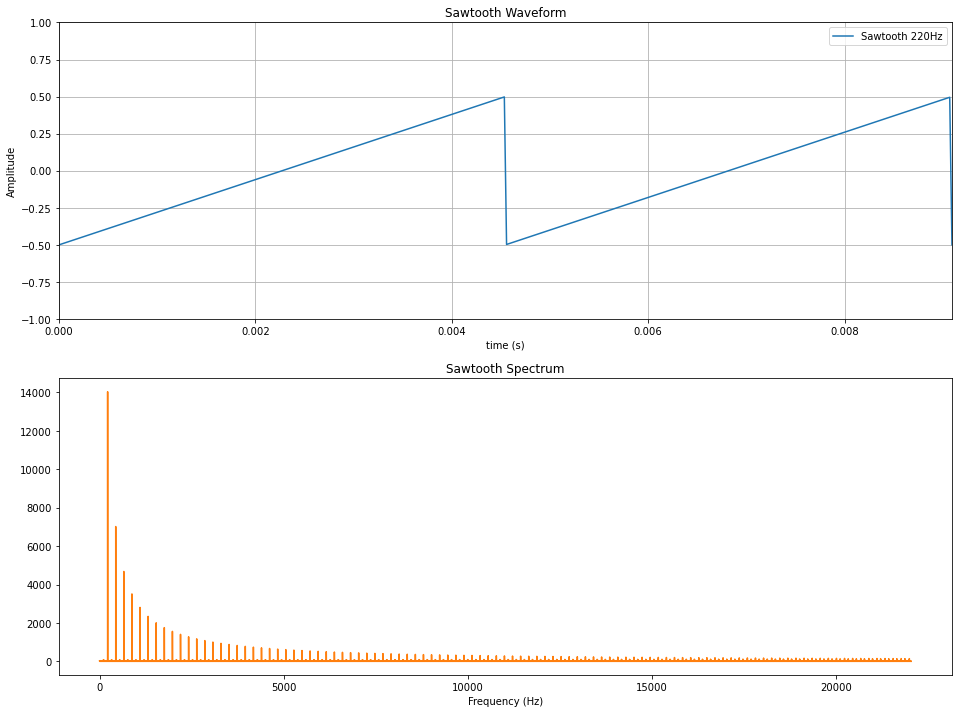

In [103]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
axes[0].plot(t, sawtooth, label=f"Sawtooth {frequency}Hz", color='C0')
axes[0].set_title('Sawtooth Waveform')
axes[0].legend()
axes[0].set_xlabel('time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)
axes[0].set_xlim(0, period*2)
axes[0].set_ylim(-1, 1)
axes[1].plot(fft_frequencies, np.abs(fft), label="Sawtooth", color='C1')
axes[1].set_title('Sawtooth Spectrum')
axes[1].set_xlabel('Frequency (Hz)')
plt.show()

## Export `sawtooth` signal to  `.wav`

In [76]:
wavfile.write("sawtooth.wav", sampling_rate, np.int16((sawtooth / sawtooth.max()) * 32767))

In [77]:
samplerate, data = wavfile.read('./sawtooth.wav')

In [78]:
sawtooth = display.Audio("./sawtooth.wav")
sawtooth

## Triangle Signal

A `sawtooth` wave is a periodic waveform that has a linear rise and an abrupt fall. On the other hand, a `triangle` wave is a periodic waveform that has a linear rise and a linear fall. One way to generate a `triangle` wave is to integrate a `sawtooth` wave.

In practice, it is easier to generate a `triangle` wave from a `sawtooth` wave using a `width` parameter. The `width` parameter modifies the rising and falling slopes of the `sawtooth` wave, resulting in a `triangle` wave.

## Generate Triangle from a Sawtooth Signal

In [84]:
# Generate the time axis
t = np.linspace(0, length, sampling_rate*length, endpoint=False)
# Signal Amplitude (-1, 1)
amplitude = 0.5
# width as a fraction of the period
width = 0.5
# Generate the sawtooth wave
triangle = amplitude*signal.sawtooth(2 * np.pi * frequency * t + theta, width)

## Fast Fourier Transform using `NumPy`

In [85]:
# Compute the FFT of the signal
fft = rfft(triangle)
# Get the frequencies corresponding to the FFT
fft_frequencies = rfftfreq(sampling_rate*length, 1 / sampling_rate)

## Plot Time domain & Frequency domain

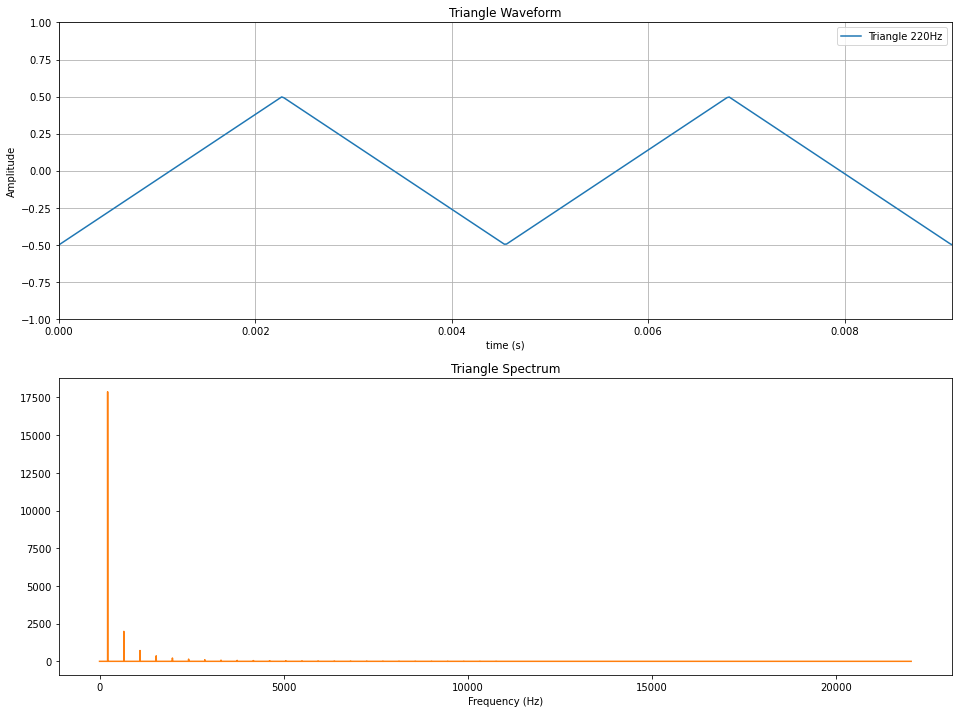

In [86]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
axes[0].plot(t, triangle, label=f"Triangle {frequency}Hz", color='C0')
axes[0].set_title('Triangle Waveform')
axes[0].legend()
axes[0].set_xlabel('time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)
axes[0].set_xlim(0, period*2)
axes[0].set_ylim(-1, 1)
axes[1].plot(fft_frequencies, np.abs(fft), label="Sawtooth", color='C1')
axes[1].set_title('Triangle Spectrum')
axes[1].set_xlabel('Frequency (Hz)')
plt.show()

## Export triangle signal to .wav

In [81]:
wavfile.write("triangle.wav", sampling_rate, np.int16((triangle / triangle.max()) * 32767))

In [82]:
samplerate, data = wavfile.read('./triangle.wav')

In [83]:
triangle = display.Audio("./triangle.wav")
triangle

## White Noise Signal

A `white noise` has a constant power spectral density over the entire frequency range, which makes it a useful tool for testing systems that are designed to process signals with a wide range of frequencies.

A `white noise` signal has an equal amount of energy at all frequencies, which means it has a flat frequency spectrum. In other words, the signal has the same power at high frequencies as it does at low frequencies.

A `white noise` is often used as a reference signal for testing and calibration of electronic equipment, or as a source of random values for simulations and statistical analysis.

To generate a `noise`, we can use the `random` function from `NumPy`.

## Generate Noise Signal using `NumPy`

In [23]:
# Set the x Axis (time)
t = np.linspace(0, length, sampling_rate * length, endpoint=False)
# Signal Amplitude (-1, 1)
Amplitude = 0.5
# Generate noise signal
noise = np.random.randn(sampling_rate*2)
# Normalize the value (-1 to 1)
noise /= np.max(np.abs(noise),axis=0)

## Fast Fourier Transform using `NumPy`

In [24]:
# Compute the FFT of the signal
fft = rfft(noise)
# Get the frequencies corresponding to the FFT
fft_frequencies = rfftfreq(sampling_rate*length, 1 / sampling_rate)

## Plot Time domain & Frequency domain

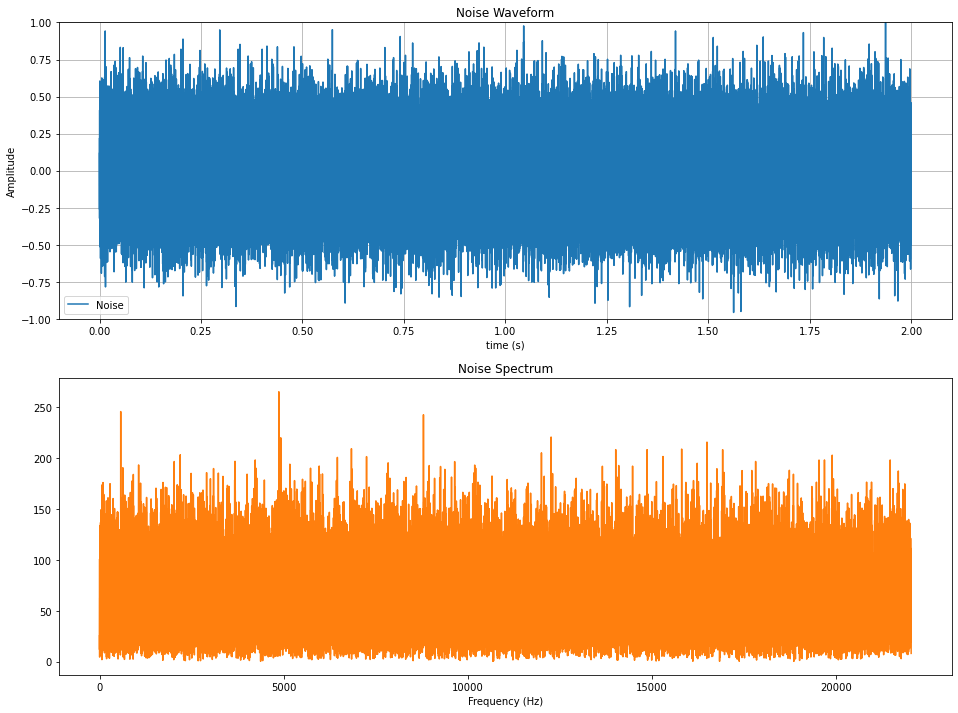

In [25]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
axes[0].plot(t, noise, label="Noise", color='C0')
axes[0].set_title('Noise Waveform')
axes[0].legend()
axes[0].set_xlabel('time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)
axes[0].set_ylim(-1, 1)
axes[1].plot(fft_frequencies, np.abs(fft), label="Noise", color='C1')
axes[1].set_title('Noise Spectrum')
axes[1].set_xlabel('Frequency (Hz)')
plt.show()

## Export `white noise` signal to  `.wav`

In [26]:
wavfile.write("white_noise.wav", sampling_rate, np.int16((noise / noise.max()) * 32767))

In [27]:
samplerate, data = wavfile.read('./white_noise.wav')

In [28]:
white_noise = display.Audio("./white_noise.wav")
white_noise